# Kaggle 자전거 수요 예측 
- https://www.kaggle.com/c/bike-sharing-demand/data

- 데이터셋을 분석해서 데이터의 특성을 확인하기(EDA)
- 데이터 전처리
- 모델 선정
- 테스트
- 결론

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

### 데이터 특성 확인

In [3]:
train_data = pd.read_csv('../Bike_Sharing_Demand/data/train.csv')
test_data = pd.read_csv('../Bike_Sharing_Demand/data/test.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
train_data.shape, test_data.shape

((10886, 12), (6493, 9))

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


### 시각화를 위한 데이터 준비 
- datetime은 날짜와 시간 정보 -> Dtype을 object에서 datetime으로 변경 

In [8]:
train_data['datetime'] = pd.to_datetime(train_data['datetime'])

- 날짜 데이터를 연,월,시로 나눔 
- min과 sec는 0으로 추가하지 않음 

In [9]:
train_data['year'] = train_data['datetime'].dt.year
train_data['month'] = train_data['datetime'].dt.month
train_data['day'] = train_data['datetime'].dt.day
train_data['hour'] = train_data['datetime'].dt.hour

train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


### 시각화 (Visualization)
- 기상 정보인 temp, atemp, windspeed, humidity 의 분포를 확인

c:\Users\jswoo\Desktop\Repository\Study_Data_Science\venv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


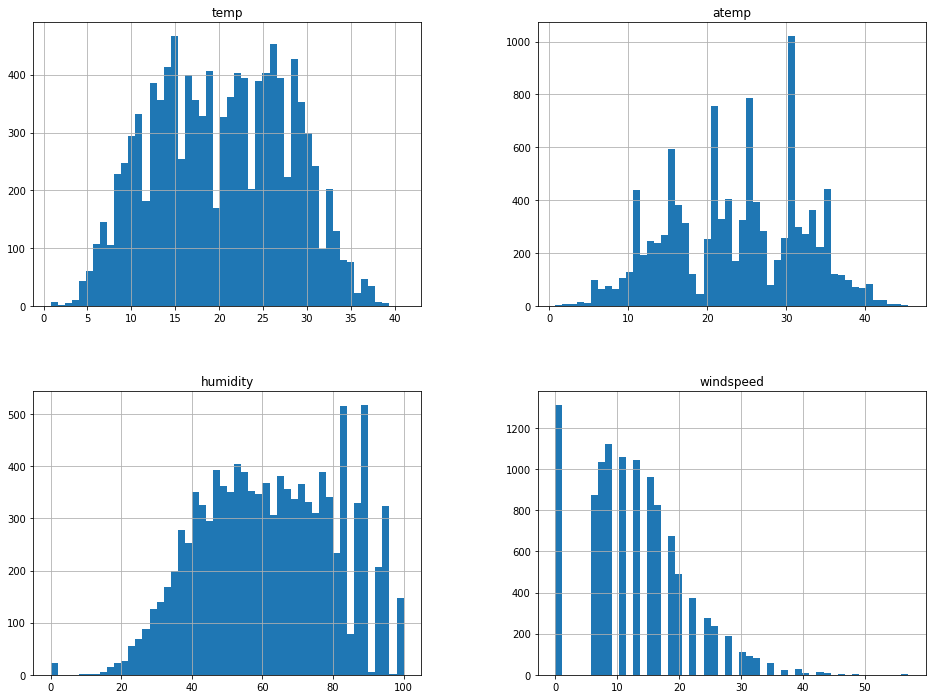

In [10]:
fig, ax = plt.subplots(figsize = (16, 12))

train_data[['temp', 'atemp', 'humidity', 'windspeed']].hist(bins = 50, ax = ax)

plt.show()

- 각 기성정보에 대한 대여량(count)의 산점도 확인

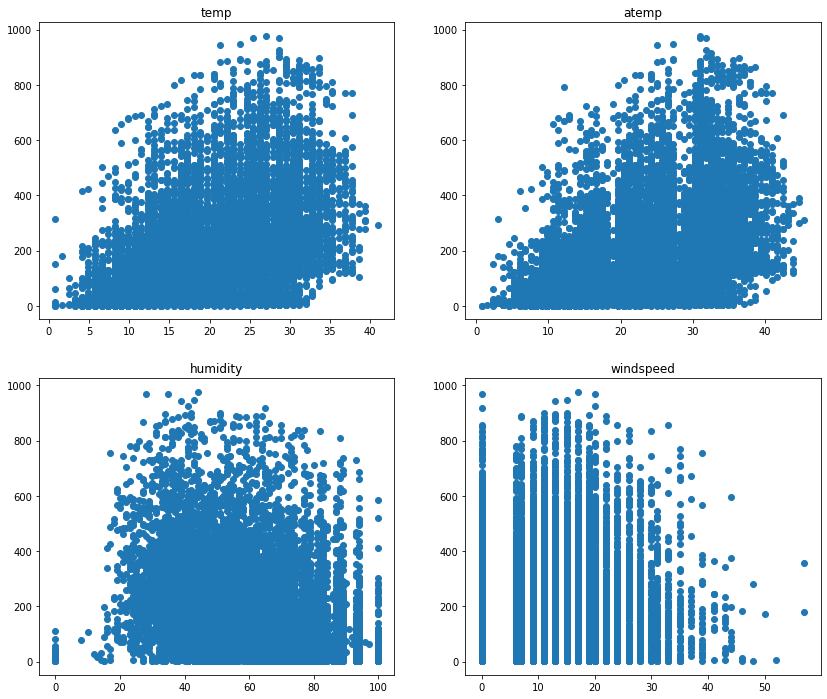

In [11]:
fig, ax = plt.subplots(2, 2, figsize = (14, 12))

ax[0][0].scatter(train_data['temp'], train_data['count'])
ax[0][1].scatter(train_data['atemp'], train_data['count'])
ax[1][0].scatter(train_data['humidity'], train_data['count'])
ax[1][1].scatter(train_data['windspeed'], train_data['count'])

ax[0][0].set(title = 'temp')
ax[0][1].set(title = 'atemp')
ax[1][0].set(title = 'humidity')
ax[1][1].set(title = 'windspeed')

plt.show()

- holiday(휴일), workingday(근무일)를 boxplot으로 시각화

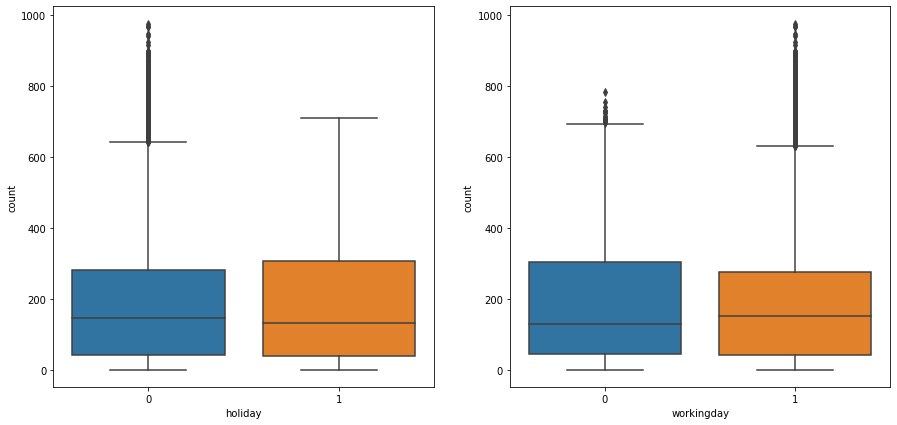

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))

sns.boxplot(data = train_data, x = 'holiday', y = 'count', ax = ax[0])
sns.boxplot(data = train_data, x = 'workingday', y = 'count', ax = ax[1])

plt.show()

- Seasen(계절), weather(날씨)를 boxplot으로 시각화 
- weather는 1.sunny, 2.cloud, 3. light, 4.heavy로 변경 

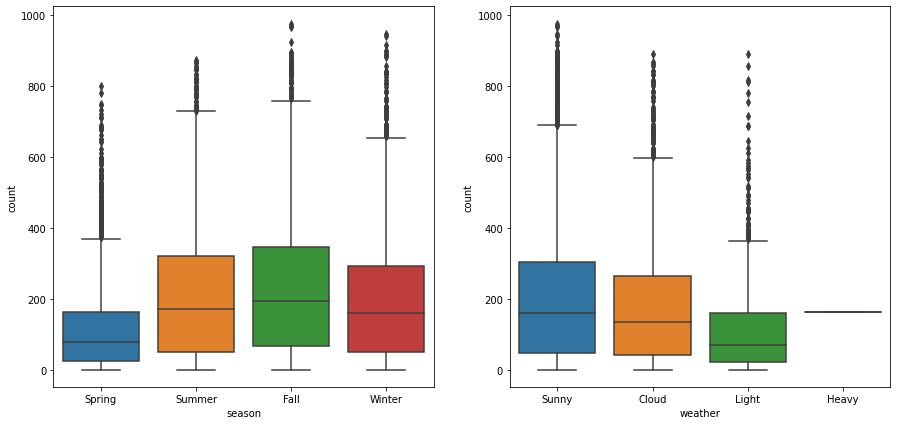

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))

sns.boxplot(data = train_data, x = 'season', y = 'count', ax = ax[0])
sns.boxplot(data = train_data,  x = 'weather', y = 'count', ax = ax[1])

ax[0].set(xticklabels = ['Spring', 'Summer', 'Fall', 'Winter'])
ax[1].set(xticklabels = ['Sunny', 'Cloud', 'Light', 'Heavy'])

plt.show()

- 날짜와 시간을 사용한 시각화
    - 일별 대여량 그래프 확인

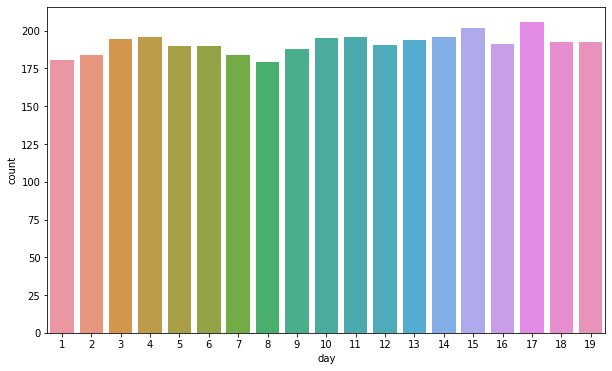

In [14]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.barplot(data = train_data, x = 'day', y = 'count', ax = ax, ci = None)

plt.show()

# 데이터 전처리 

### 데이터 상관관계(Correlation) 확인
- 상관계수 계산시 -1 ~ 1 사이의 값을 가진다 -> 양의 상관관계 : x의 값이 증가하면 y의 값 증가
- 상관관계가 인과관계를 의미하지는 않음 -> 정도를 설명하는 것 

<AxesSubplot:>

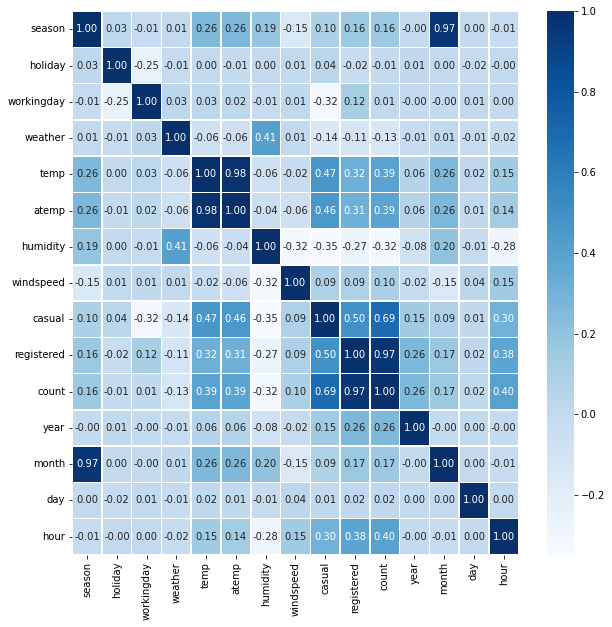

In [15]:
train_data_corr = train_data.corr() 

plt.figure(figsize = (10,10))
sns.heatmap(data = train_data_corr, annot = True, fmt = '.2f', linewidths=.5, cmap = 'Blues')

- month와 season의 상관관계가 높고 atemp와 temp의 상관관계가 높은 것을 확인
- atemp와 temp 경우 같은 feature라고 판단 